Nome: Felipe Faustino Brito

Matrícula: 2021007366

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import control as ctl
import control.matlab as cnt
pi = np.pi

1) Gerar o sinal no Python com duração de 2s. Este sinal será usado para testar o filtro a ser
desenvolvido.

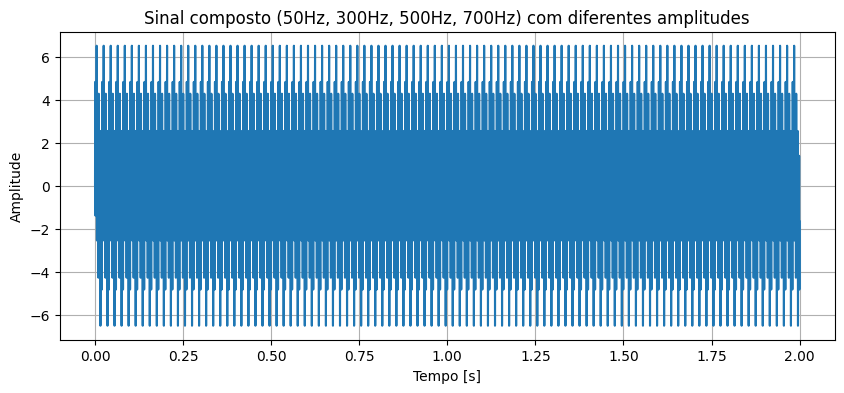

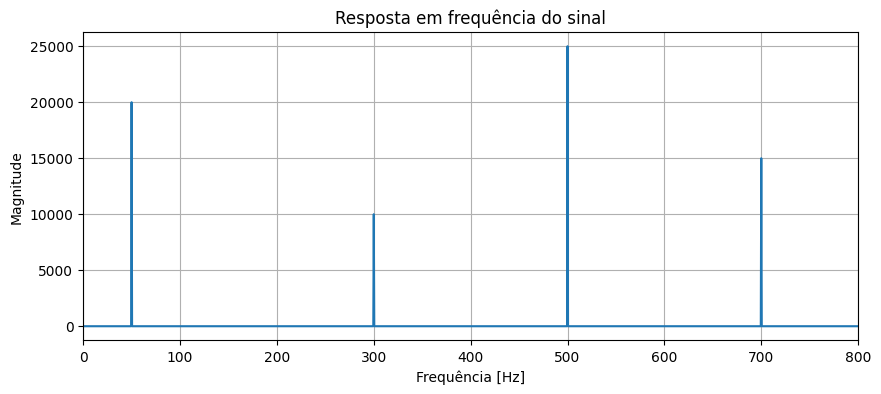

In [2]:
# Definir parâmetros do sinal com fs = 10kHz
fs = 10000  # frequência de amostragem em Hz
t = np.arange(0, 2, 1/fs)  # vetor de tempo de 2 segundos, usando np.arange

# Definir amplitudes e frequências das componentes
components = {
    50: 2,   # 50Hz com amplitude 2
    300: 1,  # 300Hz com amplitude 1
    500: 2.5, # 500Hz com amplitude 2.5
    700: 1.5 # 700Hz com amplitude 1.5
}

# Gerar sinal composto com as amplitudes respectivas
signal_data = np.zeros_like(t)
for freq, amp in components.items():
    signal_data += amp * np.sin(2 * np.pi * freq * t)

# Plotar o sinal no domínio do tempo
plt.figure(figsize=(10, 4))
plt.plot(t, signal_data)
plt.title('Sinal composto')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Resposta em frequência (FFT)
frequencia = np.fft.fftfreq(len(signal_data), 1/fs)
espectro = np.fft.fft(signal_data)

# Plotar a magnitude da resposta em frequência
plt.figure(figsize=(10, 4))
plt.plot(frequencia[:len(frequencia)//2], np.abs(espectro)[:len(frequencia)//2])
plt.title('Resposta em frequência do sinal')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 800)
plt.show()

2) Projetar um filtro IIR Butterworth (manualmente, usando as equações do filtro) para eliminar todas
as componentes (reduzir para menos de 20% de sua amplitude original), exceto a de 300Hz. É
desejável que o filtro não afete (tolerância de ±5%) as amplitudes das componentes que devem
permanecer no sinal.

Parametros:

$$ Wp_1 = 250 Hz $$
$$ Wp_2 = 350 Hz $$
$$ Rp = 0.90 $$
$$ Ws_1 = 100 Hz $$
$$ Ws_2 = 450 Hz $$
$$ Rs = 0.20 $$

# Passa Alta

Wp =  1570.7963267948965 rad/s
Wp =  249.99999999999997 Hz
Rp =  0.9
Rp =  -0.9151498112135024 dB

Ws =  628.3185307179587 rad/s
Ws =  100.0 Hz
Rs =  0.2
Rs =  -13.979400086720375 dB

 -2.5254342562146372

N =  -3
Wc =  1233.5723909571016 rad/s
fc =  196.32914368251076 Hz

N =  3

Todos os polos:  [  616.78619548+1.06830503e+03j  -616.78619548+1.06830503e+03j
 -1233.57239096+1.51069048e-13j  -616.78619548-1.06830503e+03j
   616.78619548-1.06830503e+03j  1233.57239096-3.02138096e-13j]
Polos estáveis:  [np.complex128(-616.7861954785506+1068.3050279759593j), np.complex128(-1233.5723909571016+1.510690480102162e-13j), np.complex128(-616.7861954785513-1068.305027975959j)]
H(s): <TransferFunction>: sys[28]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


                  s^3
----------------------------------------
s^3 + 2467 s^2 + 3.043e+06 s + 1.877e+09



c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


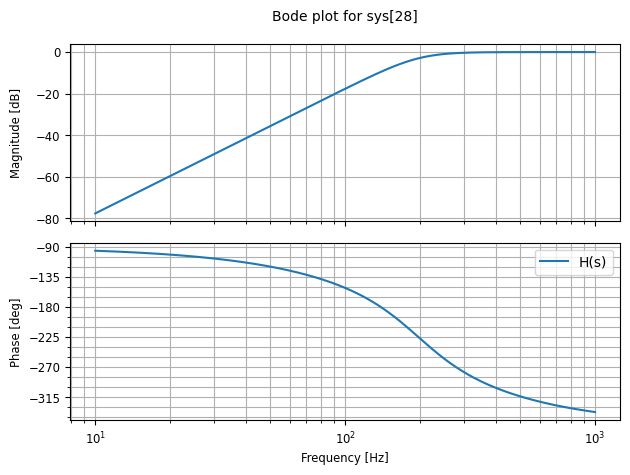

In [11]:
# Exemplo de Butterworth passa-altas
# 1) Especificações: para o passa-altas, as especificações devem
#gerar uma ordem com sinal negativo. Deve-se proceder assim mesmo.
Wp = 2*pi*250
print('Wp = ',Wp,'rad/s')
print('Wp = ',Wp/(2*pi),'Hz')
Rp = 0.90
print('Rp = ',Rp)
print('Rp = ',20*np.log10(Rp),'dB')
Ws = 2*pi*100
print('\nWs = ',Ws,'rad/s')
print('Ws = ',Ws/(2*pi),'Hz')
Rs = 0.20
print('Rs = ',Rs)
print('Rs = ',20*np.log10(Rs),'dB')
# 2) Cálculo da Ordem do Filtro e sua Frequência de Corte:
#calcular a frequência de corte com a ordem negativa
N = np.log10((1/Rp**2 - 1)/(1/Rs**2 - 1)) / (2*np.log10(Wp/Ws))
print('\n',N)
N = int(np.sign(N)*np.ceil(abs(N)))
print('\nN = ',N)
Wc = Wp*(1/(1/Rp**2 - 1))**(1/(2*N))
print('Wc = ',Wc,'rad/s')
print('fc = ',Wc/(2*pi),'Hz')
# 3) Cálculo dos polos do filtro:
# para o restante do procedimento, usar a ordem com sinal positivo.
if N<0:
    N = -N
print('\nN = ',N)
k = np.arange(0,2*N)
polos = Wc*np.exp((1j*pi/(2*N))*(2*k+N-1))
print('\nTodos os polos: ',polos)
polosEst = [p for p in polos if np.real(p)<0]
print('Polos estáveis: ',polosEst)
# 4) Montar a função de transferência contínua:
#no numerador, usa-se s**N no lugar de Wc**N
numS = np.append(1,np.zeros(N))
denS = np.poly(polosEst)
Hpas = ctl.tf(numS,denS)
print('H(s):',Hpas)
# 5) Converter para discreto
# Ts = 1/10000
# Hz = ctl.c2d(Hs,Ts,'bilinear')
# print('H(z):',Hz)
plt.figure(3)
plt.clf()
ctl.bode(Hpas,dB=True,Hz=True)
# ctl.bode(Hz,dB=True,Hz=True)
plt.legend(['H(s)'])
plt.show()


# numZ = Hz.num[0][0]
# denZ = Hz.den[0][0]
# w,h = signal.freqz(numZ,denZ,worN=2000,fs=1/Ts)
# fig4 = plt.figure(4)
# fig4.clf()
# ax0 = fig4.add_subplot(211)
# ax0.plot(w,20*np.log10(abs(h)))
# ax0.grid(True)
# ax1 = fig4.add_subplot(212)
# ax1.plot(w,np.angle(h)*180/np.pi)
# ax1.grid(True)
# plt.show()


# Passa Baixa

Wp =  2199.114857512855 rad/s
Wp =  349.99999999999994 Hz
Rp =  0.9
Rp =  -0.9151498112135024 dB

Ws =  2827.4333882308138 rad/s
Ws =  450.0 Hz
Rs =  0.2
Rs =  -13.979400086720375 dB

 9.20771647993273

N =  10
Wc =  2364.473677549296 rad/s
fc =  376.31767359264273 Hz

Todos os polos:  [  369.88517485+2335.36308296j  -369.88517485+2335.36308296j
 -1073.44858649+2106.76147297j -1671.93537133+1671.93537133j
 -2106.76147297+1073.44858649j -2335.36308296 +369.88517485j
 -2335.36308296 -369.88517485j -2106.76147297-1073.44858649j
 -1671.93537133-1671.93537133j -1073.44858649-2106.76147297j
  -369.88517485-2335.36308296j   369.88517485-2335.36308296j
  1073.44858649-2106.76147297j  1671.93537133-1671.93537133j
  2106.76147297-1073.44858649j  2335.36308296 -369.88517485j
  2335.36308296 +369.88517485j  2106.76147297+1073.44858649j
  1671.93537133+1671.93537133j  1073.44858649+2106.76147297j]
Polos estáveis:  [np.complex128(-369.8851748491313+2335.3630829595472j), np.complex128(-1073.448586491

c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


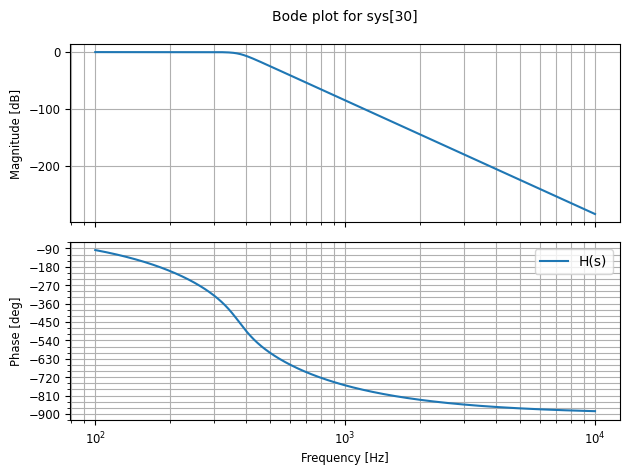

In [12]:
# Exemplo de Butterworth Passa-baixas
# 1) Especificações
Wp = 2*pi*350
print('Wp = ',Wp,'rad/s')
print('Wp = ',Wp/(2*pi),'Hz')
Rp = 0.90
print('Rp = ',Rp)
print('Rp = ',20*np.log10(Rp),'dB')
Ws = 2*pi*450
print('\nWs = ',Ws,'rad/s')
print('Ws = ',Ws/(2*pi),'Hz')
Rs = 0.20
print('Rs = ',Rs)
print('Rs = ',20*np.log10(Rs), 'dB')
# 2) Cálculo da Ordem do Filtro e sua Frequência de Corte
N = np.log10((1/Rp**2 - 1)/(1/Rs**2 - 1)) / (2*np.log10(Wp/Ws))
print('\n',N)
N = int(np.ceil(N))
print('\nN = ',N)
Wc = Wp*(1/(1/Rp**2 - 1))**(1/(2*N))
print('Wc = ',Wc,'rad/s')
print('fc = ',Wc/(2*pi),'Hz')
# 3) Cálculo dos polos do filtro
k = np.arange(0,2*N)
polos = Wc*np.exp((1j*pi/(2*N))*(2*k+N-1))
print('\nTodos os polos: ',polos)
polosEst = [p for p in polos if np.real(p)<0]
print('Polos estáveis: ',polosEst)
# 4) Montar a função de transferência contínua
numS = Wc**N
denS = np.poly(polosEst)
Hpbs = ctl.tf(numS,denS)
print('H(s):',Hpbs)
# 5) Converter para discreto
Ts = 1/10000
# Hz = ctl.c2d(Hpbs,Ts,'bilinear')
# print('H(z):',Hz)
plt.figure(1)
plt.clf()
ctl.bode(Hpbs,dB=True,Hz=True)
# ctl.bode(Hz,dB=True,Hz=True)
plt.legend(['H(s)'])
plt.show()

# numZ = Hz.num[0][0]
# denZ = Hz.den[0][0]
# w,h = signal.freqz(numZ,denZ,worN=1000,fs=1/Ts)
# fig2 = plt.figure(2)
# fig2.clf()
# ax0 = fig2.add_subplot(211)
# ax0.plot(w,20*np.log10(abs(h)))
# ax0.grid(True)
# ax1 = fig2.add_subplot(212)
# ax1.plot(w,np.angle(h)*180/np.pi)
# ax1.grid(True)
# plt.show()

# Combinando filtros para obter Passa-Faixa

c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


0 states have been removed from the model

Passa-faixa:
Hpf(s): <TransferFunction>: sys[39]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


                                                                                                 5.462e+33 s^3
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
s^13 + 1.758e+04 s^12 + 1.546e+08 s^11 + 8.955e+11 s^10 + 3.8e+15 s^9 + 1.243e+19 s^8 + 3.211e+22 s^7 + 6.616e+25 s^6 + 1.084e+29 s^5 + 1.391e+32 s^4 + 1.358e+35 s^3 + 9.589e+37 s^2 + 4.434e+40 s + 1.025e+43



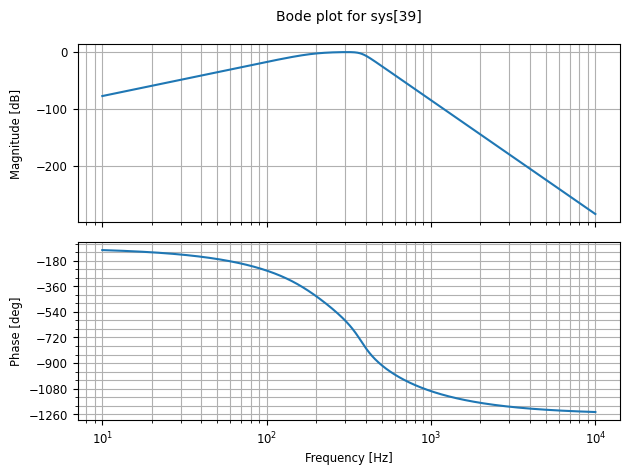

c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part


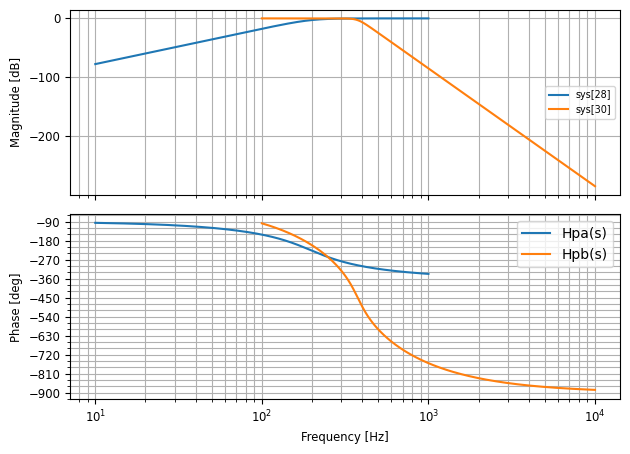

c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\scipy\signal\_lti_conversion.py:461: LinAlgWarning: Ill-conditioned matrix (rcond=9.15355e-78): result may not be accurate.
  ad = linalg.solve(ima, np.eye(a.shape[0]) + (1.0-alpha)*dt*a)
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\scipy\signal\_lti_conversion.py:462: LinAlgWarning: Ill-conditioned matrix (rcond=9.15355e-78): result may not be accurate.
  bd = linalg.solve(ima, dt*b)
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\scipy\signal\_lti_conversion.py:465: LinAlgWarning: Ill-conditioned matrix (rcond=9.07472e-78): result may not be accurate.
  cd = linalg.solve(ima.transpose(), c.transpose())


H(z): <TransferFunction>: sys[39]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


2.217e-10 z^13 + 1.552e-09 z^12 + 3.991e-09 z^11 + 3.104e-09 z^10 - 5.542e-09 z^9 - 1.397e-08 z^8 - 7.98e-09 z^7 + 7.98e-09 z^6 + 1.397e-08 z^5 + 5.542e-09 z^4 - 3.104e-09 z^3 - 3.991e-09 z^2 - 1.552e-09 z - 2.217e-10
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                              z^13 - 11.25 z^12 + 58.51 z^11 - 186.3 z^10 + 405.1 z^9 - 635.3 z^8 + 739.1 z^7 - 645.9 z^6 + 424 z^5 - 206.4 z^4 + 72.48 z^3 - 17.38 z^2 + 2.549 z - 0.1728

dt = 0.0001



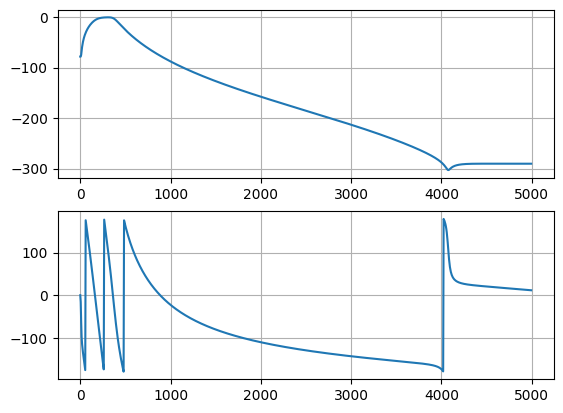

In [14]:
# 3) Combinar os filtros em cascata
Hpfs = ctl.minreal(Hpas * Hpbs)
print('\nPassa-faixa:')
print('Hpf(s):',Hpfs)
plt.figure(3)
plt.clf()
ctl.bode(Hpfs,dB=True,Hz=True)
plt.show()


plt.figure(3)
plt.clf()
ctl.bode(Hpas,dB=True,Hz=True)
ctl.bode(Hpbs,dB=True,Hz=True)
plt.legend(['Hpa(s)', 'Hpb(s)'])
plt.show()


Ts = 1/10000
Hpfz = ctl.c2d(Hpfs,Ts,'bilinear')
print('H(z):',Hpfz)

numZ = Hpfz.num[0][0]
denZ = Hpfz.den[0][0]
w,h = signal.freqz(numZ,denZ,worN=1000,fs=1/Ts)
fig2 = plt.figure(2)
fig2.clf()
ax0 = fig2.add_subplot(211)
ax0.plot(w,20*np.log10(abs(h)))
ax0.grid(True)
ax1 = fig2.add_subplot(212)
ax1.plot(w,np.angle(h)*180/np.pi)
ax1.grid(True)
plt.show()

3) Fazer uma função Python para implementar o filtro projetado. Esta função deve receber como
argumento de entrada somente o sinal a ser filtrado e deve devolver somente o sinal filtrado e não
deve conter comandos de construção do filtro. Aplicar esta função no sinal do exercício 1. Forneça o
espectro do sinal filtrado que comprova o funcionamento da função de filtragem.

Sinal filtrado: [0.00000000e+00+0.00000000e+00j 3.68378136e-10+0.00000000e+00j
 7.41425479e-09-1.90503536e-15j ... 1.07732996e+00+3.33061766e-07j
 1.05413727e+00+3.22738903e-07j 9.86713533e-01+3.07726493e-07j]
sinal:  [ 0.          1.66141426  3.11893859 ... -4.19946065 -3.11893859
 -1.66141426]


c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


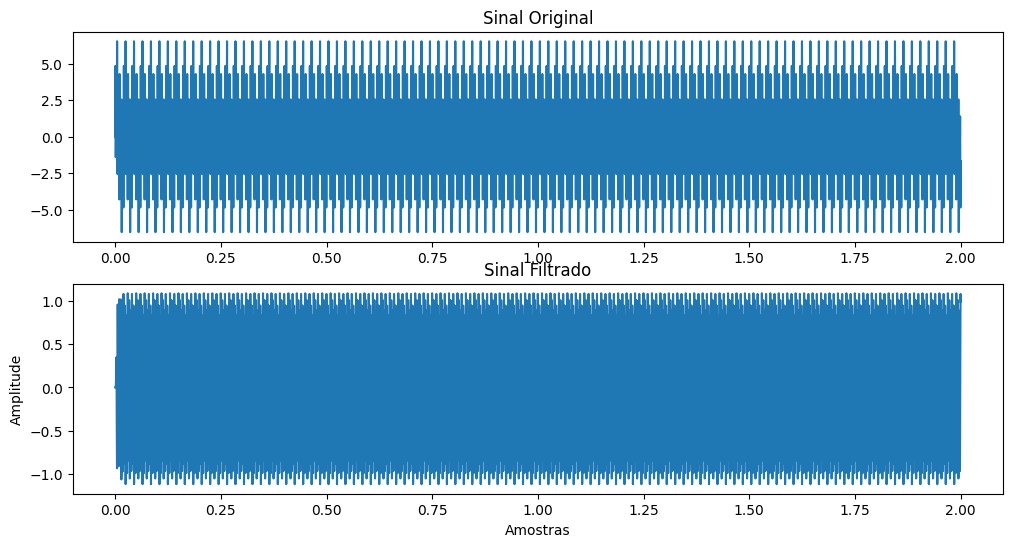

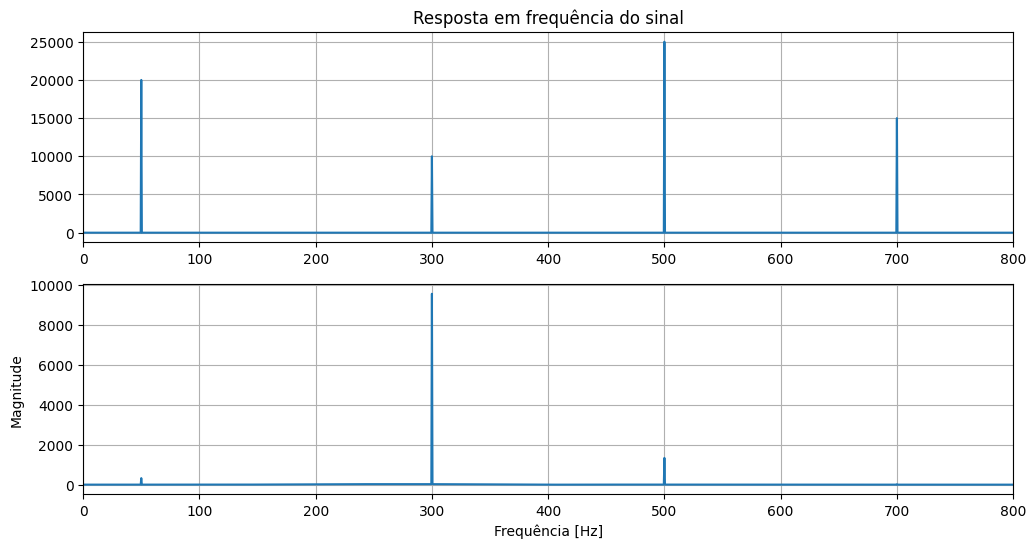

In [15]:
def filtrar_sinal(Hz, signal_data, t):
    """
    Filtra um sinal utilizando a função de transferência discreta Hz.

    Args:
        Hz: Função de transferência discreta do filtro.
        signal_data: Sinal a ser filtrado.

    Returns:
        numpy.ndarray: Sinal filtrado.
    """

    b = np.reshape(Hz.num, -1)
    a = np.reshape(Hz.den, -1)

    yout = signal.lfilter(b, a, signal_data)

    return yout

t = np.arange(0, 2, 1/fs)
yout = filtrar_sinal(Hpfz, signal_data, t)


print('Sinal filtrado:', yout)
print('sinal: ', signal_data)

# Plot no domínio do tempo
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal_data)
plt.title('Sinal Original')
plt.subplot(2, 1, 2)
plt.plot(t, yout)
plt.title('Sinal Filtrado')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')


# Resposta em frequência (FFT)
frequencia = np.fft.fftfreq(len(signal_data), 1/fs)
espectro = np.fft.fft(signal_data)

frequencia_filtr = np.fft.fftfreq(len(yout), 1/fs)
espectro_filtr = np.fft.fft(yout)

# Plotar a magnitude da resposta em frequência
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(frequencia[:len(frequencia)//2], np.abs(espectro)[:len(frequencia)//2])
plt.title('Resposta em frequência do sinal')
plt.grid(True)
plt.xlim(0, 800)
plt.subplot(2, 1, 2)
plt.plot(frequencia_filtr[:len(frequencia_filtr)//2], np.abs(espectro_filtr)[:len(frequencia_filtr)//2])
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 800)
plt.show()

4) Projetar um filtro IIR Butterworth (manualmente, usando as equações do filtro) para eliminar a
componente de 500Hz (reduzir para menos de 20% de sua amplitude original). É desejável que o
filtro não afete (tolerância de ±5%) as amplitudes das outras componentes que devem permanecer no
sinal.

Parametros:

$$ Wp_1 = 650 Hz $$
$$ Wp_2 = 350 Hz $$
$$ Rp = 0.90 $$
$$ Ws_1 = 550 Hz $$
$$ Ws_2 = 450 Hz $$
$$ Rs = 0.20 $$

# Passa Alta

Wp =  4084.070449666731 rad/s
Wp =  650.0 Hz
Rp =  0.85
Rp =  -1.4116214857141456 dB

Ws =  3455.7519189487725 rad/s
Ws =  550.0 Hz
Rs =  0.25
Rs =  -12.041199826559248 dB

 -10.969341741304923

N =  -11
Wc =  3910.2403999184053 rad/s
fc =  622.3340883246439 Hz

N =  11

Todos os polos:  [  556.48523012+3.87043979e+03j  -556.48523012+3.87043979e+03j
 -1624.37256657+3.55687978e+03j -2560.66289819+2.95516252e+03j
 -3289.50355065+2.11403557e+03j -3751.84818887+1.10164203e+03j
 -3910.24039992+4.78866339e-13j -3751.84818887-1.10164203e+03j
 -3289.50355065-2.11403557e+03j -2560.66289819-2.95516252e+03j
 -1624.37256657-3.55687978e+03j  -556.48523012-3.87043979e+03j
   556.48523012-3.87043979e+03j  1624.37256657-3.55687978e+03j
  2560.66289819-2.95516252e+03j  3289.50355065-2.11403557e+03j
  3751.84818887-1.10164203e+03j  3910.24039992-9.57732678e-13j
  3751.84818887+1.10164203e+03j  3289.50355065+2.11403557e+03j
  2560.66289819+2.95516252e+03j  1624.37256657+3.55687978e+03j]
Polos estáveis:  

c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


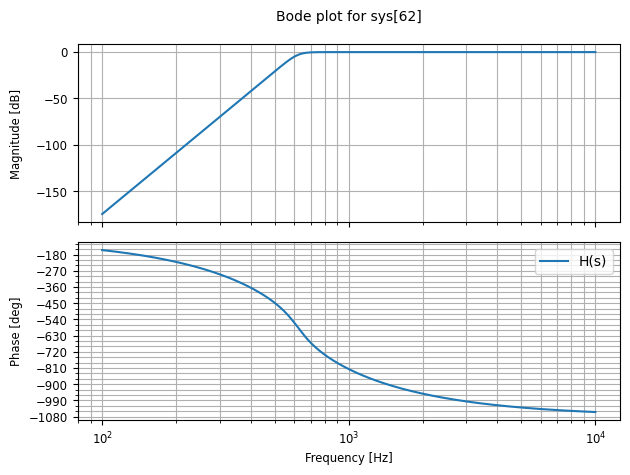

In [22]:
# Exemplo de Butterworth passa-altas
# 1) Especificações: para o passa-altas, as especificações devem
#gerar uma ordem com sinal negativo. Deve-se proceder assim mesmo.
Wp = 2*pi*650
print('Wp = ',Wp,'rad/s')
print('Wp = ',Wp/(2*pi),'Hz')
Rp = 0.85
print('Rp = ',Rp)
print('Rp = ',20*np.log10(Rp),'dB')
Ws = 2*pi*550
print('\nWs = ',Ws,'rad/s')
print('Ws = ',Ws/(2*pi),'Hz')
Rs = 0.25
print('Rs = ',Rs)
print('Rs = ',20*np.log10(Rs),'dB')
# 2) Cálculo da Ordem do Filtro e sua Frequência de Corte:
#calcular a frequência de corte com a ordem negativa
N = np.log10((1/Rp**2 - 1)/(1/Rs**2 - 1)) / (2*np.log10(Wp/Ws))
print('\n',N)
N = int(np.sign(N)*np.ceil(abs(N)))
print('\nN = ',N)
Wc = Wp*(1/(1/Rp**2 - 1))**(1/(2*N))
print('Wc = ',Wc,'rad/s')
print('fc = ',Wc/(2*pi),'Hz')
# 3) Cálculo dos polos do filtro:
# para o restante do procedimento, usar a ordem com sinal positivo.
if N<0:
    N = -N
print('\nN = ',N)
k = np.arange(0,2*N)
polos = Wc*np.exp((1j*pi/(2*N))*(2*k+N-1))
print('\nTodos os polos: ',polos)
polosEst = [p for p in polos if np.real(p)<0]
print('Polos estáveis: ',polosEst)
# 4) Montar a função de transferência contínua:
#no numerador, usa-se s**N no lugar de Wc**N
numS = np.append(1,np.zeros(N))
denS = np.poly(polosEst)
Hpas = ctl.tf(numS,denS)
print('H(s):',Hpas)
# 5) Converter para discreto
# Ts = 1/10000
# Hz = ctl.c2d(Hs,Ts,'bilinear')
# print('H(z):',Hz)
plt.figure(3)
plt.clf()
ctl.bode(Hpas,dB=True,Hz=True)
# ctl.bode(Hz,dB=True,Hz=True)
plt.legend(['H(s)'])
plt.show()


# numZ = Hz.num[0][0]
# denZ = Hz.den[0][0]
# w,h = signal.freqz(numZ,denZ,worN=2000,fs=1/Ts)
# fig4 = plt.figure(4)
# fig4.clf()
# ax0 = fig4.add_subplot(211)
# ax0.plot(w,20*np.log10(abs(h)))
# ax0.grid(True)
# ax1 = fig4.add_subplot(212)
# ax1.plot(w,np.angle(h)*180/np.pi)
# ax1.grid(True)
# plt.show()


# Passa Baixa

Wp =  2199.114857512855 rad/s
Wp =  349.99999999999994 Hz
Rp =  0.85
Rp =  -1.4116214857141456 dB

Ws =  2827.4333882308138 rad/s
Ws =  450.0 Hz
Rs =  0.25
Rs =  -12.041199826559248 dB

 7.2915564636938015

N =  8
Wc =  2334.647631226791 rad/s
fc =  371.57071088752815 Hz

Todos os polos:  [  455.46715817+2289.78803164j  -455.46715817+2289.78803164j
 -1297.0607285 +1941.1885608j  -1941.1885608 +1297.0607285j
 -2289.78803164 +455.46715817j -2289.78803164 -455.46715817j
 -1941.1885608 -1297.0607285j  -1297.0607285 -1941.1885608j
  -455.46715817-2289.78803164j   455.46715817-2289.78803164j
  1297.0607285 -1941.1885608j   1941.1885608 -1297.0607285j
  2289.78803164 -455.46715817j  2289.78803164 +455.46715817j
  1941.1885608 +1297.0607285j   1297.0607285 +1941.1885608j ]
Polos estáveis:  [np.complex128(-455.46715817022556+2289.788031635506j), np.complex128(-1297.06072849933+1941.1885607991958j), np.complex128(-1941.1885607991958+1297.0607284993305j), np.complex128(-2289.788031635506+455.4671

c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


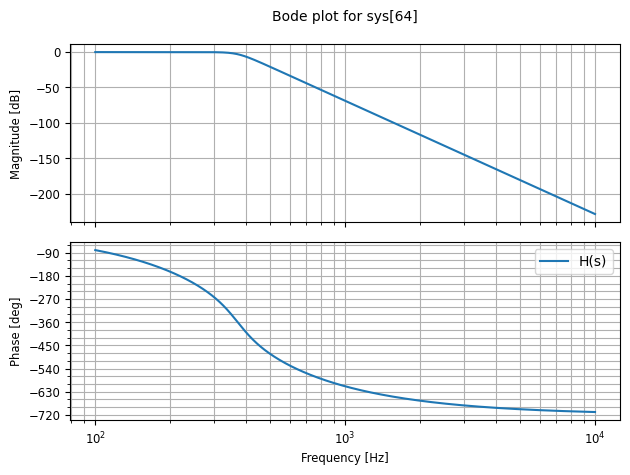

In [23]:
# Exemplo de Butterworth Passa-baixas
# 1) Especificações
Wp = 2*pi*350
print('Wp = ',Wp,'rad/s')
print('Wp = ',Wp/(2*pi),'Hz')
Rp = 0.85
print('Rp = ',Rp)
print('Rp = ',20*np.log10(Rp),'dB')
Ws = 2*pi*450
print('\nWs = ',Ws,'rad/s')
print('Ws = ',Ws/(2*pi),'Hz')
Rs = 0.25
print('Rs = ',Rs)
print('Rs = ',20*np.log10(Rs), 'dB')
# 2) Cálculo da Ordem do Filtro e sua Frequência de Corte
N = np.log10((1/Rp**2 - 1)/(1/Rs**2 - 1)) / (2*np.log10(Wp/Ws))
print('\n',N)
N = int(np.ceil(N))
print('\nN = ',N)
Wc = Wp*(1/(1/Rp**2 - 1))**(1/(2*N))
print('Wc = ',Wc,'rad/s')
print('fc = ',Wc/(2*pi),'Hz')
# 3) Cálculo dos polos do filtro
k = np.arange(0,2*N)
polos = Wc*np.exp((1j*pi/(2*N))*(2*k+N-1))
print('\nTodos os polos: ',polos)
polosEst = [p for p in polos if np.real(p)<0]
print('Polos estáveis: ',polosEst)
# 4) Montar a função de transferência contínua
numS = Wc**N
denS = np.poly(polosEst)
Hpbs = ctl.tf(numS,denS)
print('H(s):',Hpbs)
# 5) Converter para discreto
Ts = 1/10000
# Hz = ctl.c2d(Hpbs,Ts,'bilinear')
# print('H(z):',Hz)
plt.figure(1)
plt.clf()
ctl.bode(Hpbs,dB=True,Hz=True)
# ctl.bode(Hz,dB=True,Hz=True)
plt.legend(['H(s)'])
plt.show()

# numZ = Hz.num[0][0]
# denZ = Hz.den[0][0]
# w,h = signal.freqz(numZ,denZ,worN=1000,fs=1/Ts)
# fig2 = plt.figure(2)
# fig2.clf()
# ax0 = fig2.add_subplot(211)
# ax0.plot(w,20*np.log10(abs(h)))
# ax0.grid(True)
# ax1 = fig2.add_subplot(212)
# ax1.plot(w,np.angle(h)*180/np.pi)
# ax1.grid(True)
# plt.show()

# Combinado filtros para gerar o Rejeita Faixa

c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


0 states have been removed from the model

Passa-faixa:
Hpf(s): <TransferFunction>: sys[67]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


                                                                                                                                                   8.826e+26 s^11
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
s^19 + 3.944e+04 s^18 + 7.779e+08 s^17 + 1.017e+13 s^16 + 9.865e+16 s^15 + 7.526e+20 s^14 + 4.674e+24 s^13 + 2.415e+28 s^12 + 1.052e+32 s^11 + 3.89e+35 s^10 + 1.227e+39 s^9 + 3.295e+42 s^8 + 7.512e+45 s^7 + 1.442e+49 s^6 + 2.3e+52 s^5 + 2.984e+55 s^4 + 3.042e+58 s^3 + 2.299e+61 s^2 + 1.151e+64 s + 2.884e+66



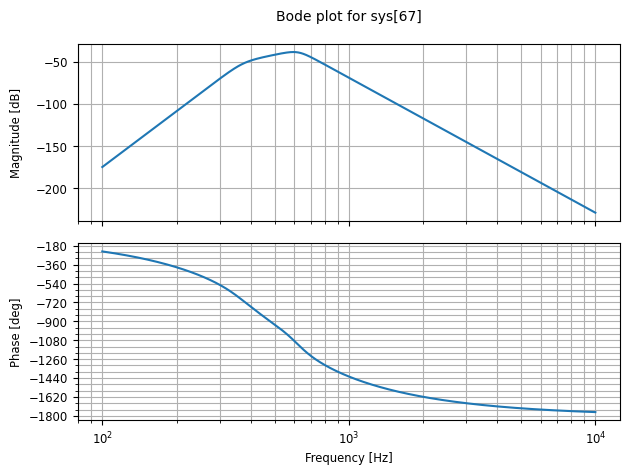

c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part


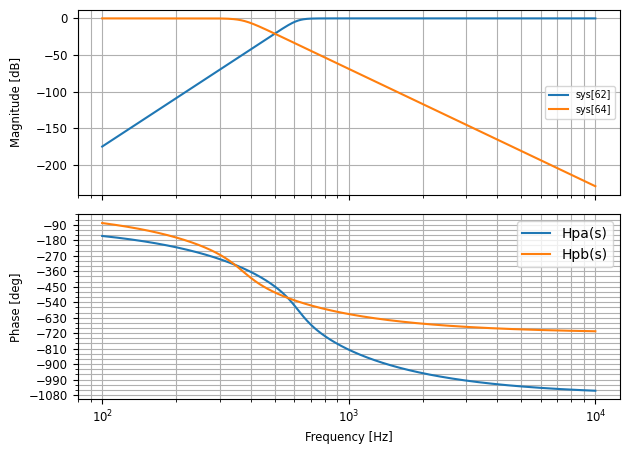

c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\scipy\signal\_lti_conversion.py:461: LinAlgWarning: Ill-conditioned matrix (rcond=3.4319e-124): result may not be accurate.
  ad = linalg.solve(ima, np.eye(a.shape[0]) + (1.0-alpha)*dt*a)
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\scipy\signal\_lti_conversion.py:462: LinAlgWarning: Ill-conditioned matrix (rcond=3.4319e-124): result may not be accurate.
  bd = linalg.solve(ima, dt*b)
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\scipy\signal\_lti_conversion.py:465: LinAlgWarning: Ill-conditioned matrix (rcond=3.40461e-124): result may not be accurate.
  cd = linalg.solve(ima.transpose(), c.transpose())


H(z): <TransferFunction>: sys[67]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


4.831e-09 z^19 - 1.449e-08 z^18 - 2.415e-08 z^17 + 1.111e-07 z^16 + 1.932e-08 z^15 - 3.671e-07 z^14 + 1.352e-07 z^13 + 6.764e-07 z^12 - 4.735e-07 z^11 - 7.438e-07 z^10 + 7.439e-07 z^9 + 4.735e-07 z^8 - 6.763e-07 z^7 - 1.352e-07 z^6 + 3.671e-07 z^5 - 1.932e-08 z^4 - 1.111e-07 z^3 + 2.415e-08 z^2 + 1.449e-08 z - 4.831e-09
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                     z^19 - 15.1 z^18 + 108.3 z^17 - 490.4 z^16 + 1572 z^15 - 3790 z^14 + 7126 z^13 - 1.069e+04 z^12 + 1.299e+04 z^11 - 1.289e+04 z^10 + 1.049e+04 z^9 - 7002 z^8 + 3816 z^7 - 1684 z^6 + 592.7 z^5 - 162.6 z^4 + 33.52 z^3 - 4.888 z^2 + 0.4

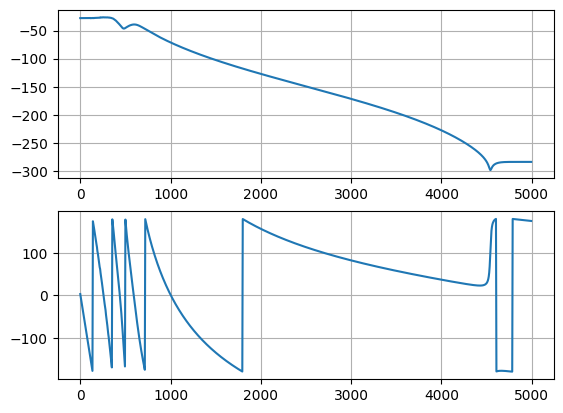

In [24]:
# 3) Combinar os filtros em cascata
Hrfs = ctl.minreal(Hpas * Hpbs)
print('\nPassa-faixa:')
print('Hpf(s):',Hrfs)
plt.figure(3)
plt.clf()
ctl.bode(Hrfs,dB=True,Hz=True)
plt.show()


plt.figure(3)
plt.clf()
ctl.bode(Hpas,dB=True,Hz=True)
ctl.bode(Hpbs,dB=True,Hz=True)
plt.legend(['Hpa(s)', 'Hpb(s)'])
plt.show()


Ts = 1/10000
Hpfz = ctl.c2d(Hrfs,Ts,'bilinear')
print('H(z):',Hpfz)

numZ = Hpfz.num[0][0]
denZ = Hpfz.den[0][0]
w,h = signal.freqz(numZ,denZ,worN=1000,fs=1/Ts)
fig2 = plt.figure(2)
fig2.clf()
ax0 = fig2.add_subplot(211)
ax0.plot(w,20*np.log10(abs(h)))
ax0.grid(True)
ax1 = fig2.add_subplot(212)
ax1.plot(w,np.angle(h)*180/np.pi)
ax1.grid(True)
plt.show()

5) Fazer uma função Python para implementar o filtro projetado. Esta função deve receber como
argumento de entrada somente o sinal a ser filtrado e deve devolver somente o sinal filtrado e não
deve conter comandos de construção do filtro. Aplicar esta função no sinal do exercício 4. Forneça o
espectro do sinal filtrado que comprova o funcionamento da função de filtragem.

Sinal filtrado: [ 0.00000000e+00+0.00000000e+00j  8.02591311e-09+0.00000000e+00j
  1.12152419e-07-1.78689847e-15j ... -1.00659475e-01-3.83625964e-03j
 -1.06745365e-01-4.71636456e-03j -1.12860688e-01-5.59044772e-03j]
sinal:  [ 0.          1.66141426  3.11893859 ... -4.19946065 -3.11893859
 -1.66141426]


c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\felip\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-_OpJIL78-py3.11\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


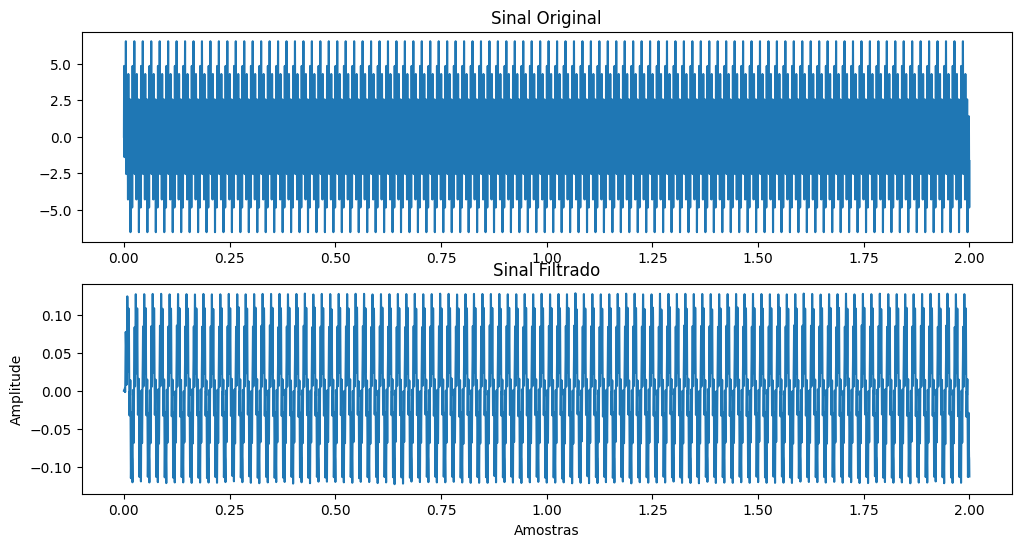

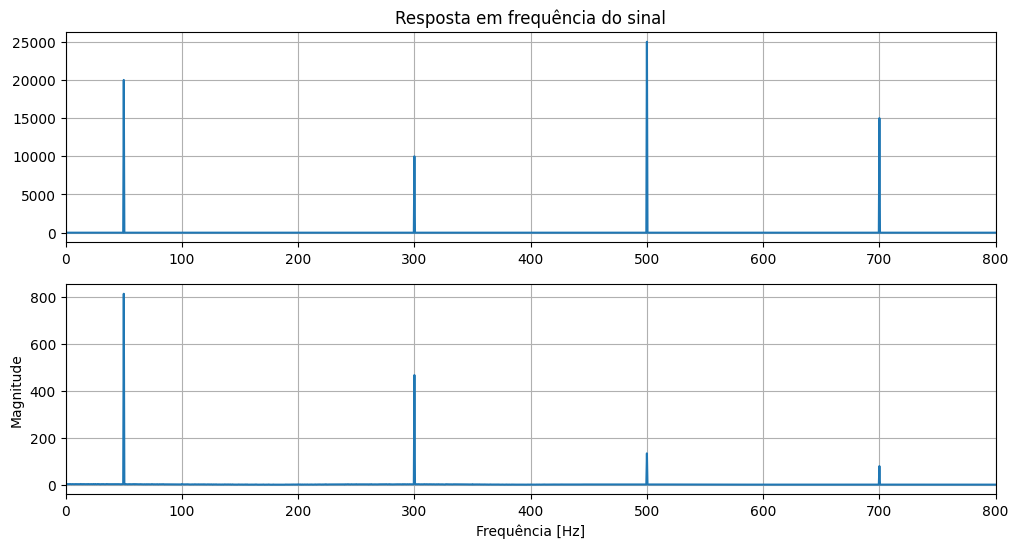

In [25]:
def filtrar_sinal(Hz, signal_data, t):
    """
    Filtra um sinal utilizando a função de transferência discreta Hz.

    Args:
        Hz: Função de transferência discreta do filtro.
        signal_data: Sinal a ser filtrado.

    Returns:
        numpy.ndarray: Sinal filtrado.
    """

    b = np.reshape(Hz.num, -1)
    a = np.reshape(Hz.den, -1)

    yout = signal.lfilter(b, a, signal_data)

    return yout

t = np.arange(0, 2, 1/fs)
yout = filtrar_sinal(Hpfz, signal_data, t)


print('Sinal filtrado:', yout)
print('sinal: ', signal_data)

# Plot no domínio do tempo
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal_data)
plt.title('Sinal Original')
plt.subplot(2, 1, 2)
plt.plot(t, yout)
plt.title('Sinal Filtrado')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')


# Resposta em frequência (FFT)
frequencia = np.fft.fftfreq(len(signal_data), 1/fs)
espectro = np.fft.fft(signal_data)

frequencia_filtr = np.fft.fftfreq(len(yout), 1/fs)
espectro_filtr = np.fft.fft(yout)

# Plotar a magnitude da resposta em frequência
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(frequencia[:len(frequencia)//2], np.abs(espectro)[:len(frequencia)//2])
plt.title('Resposta em frequência do sinal')
plt.grid(True)
plt.xlim(0, 800)
plt.subplot(2, 1, 2)
plt.plot(frequencia_filtr[:len(frequencia_filtr)//2], np.abs(espectro_filtr)[:len(frequencia_filtr)//2])
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 800)
plt.show()